## CV Project - 7 

### Two class classification of heart sound signals using the discrete wavelet transform

###### Sourav Das (121CS0161)
###### Ashutosh Das (121CS0159)
###### Rajdeep Das (121CS0160)
###### Digesh Dansana (121CS0158)

In [1]:
import tensorflow as tf
import librosa
import pywt
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow import keras
from keras.models import Model
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from keras.optimizers import Adam
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Input, Dense, Conv1D, GlobalMaxPool1D,Activation,MaxPool1D,Flatten,BatchNormalization

2024-04-03 22:29:48.801978: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 22:29:48.835271: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 22:29:48.835320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 22:29:48.836615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 22:29:48.843282: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 22:29:48.844128: I tensorflow/core/platform/cpu_feature_guard.cc:1

### Sample output for a Normal Test Case 

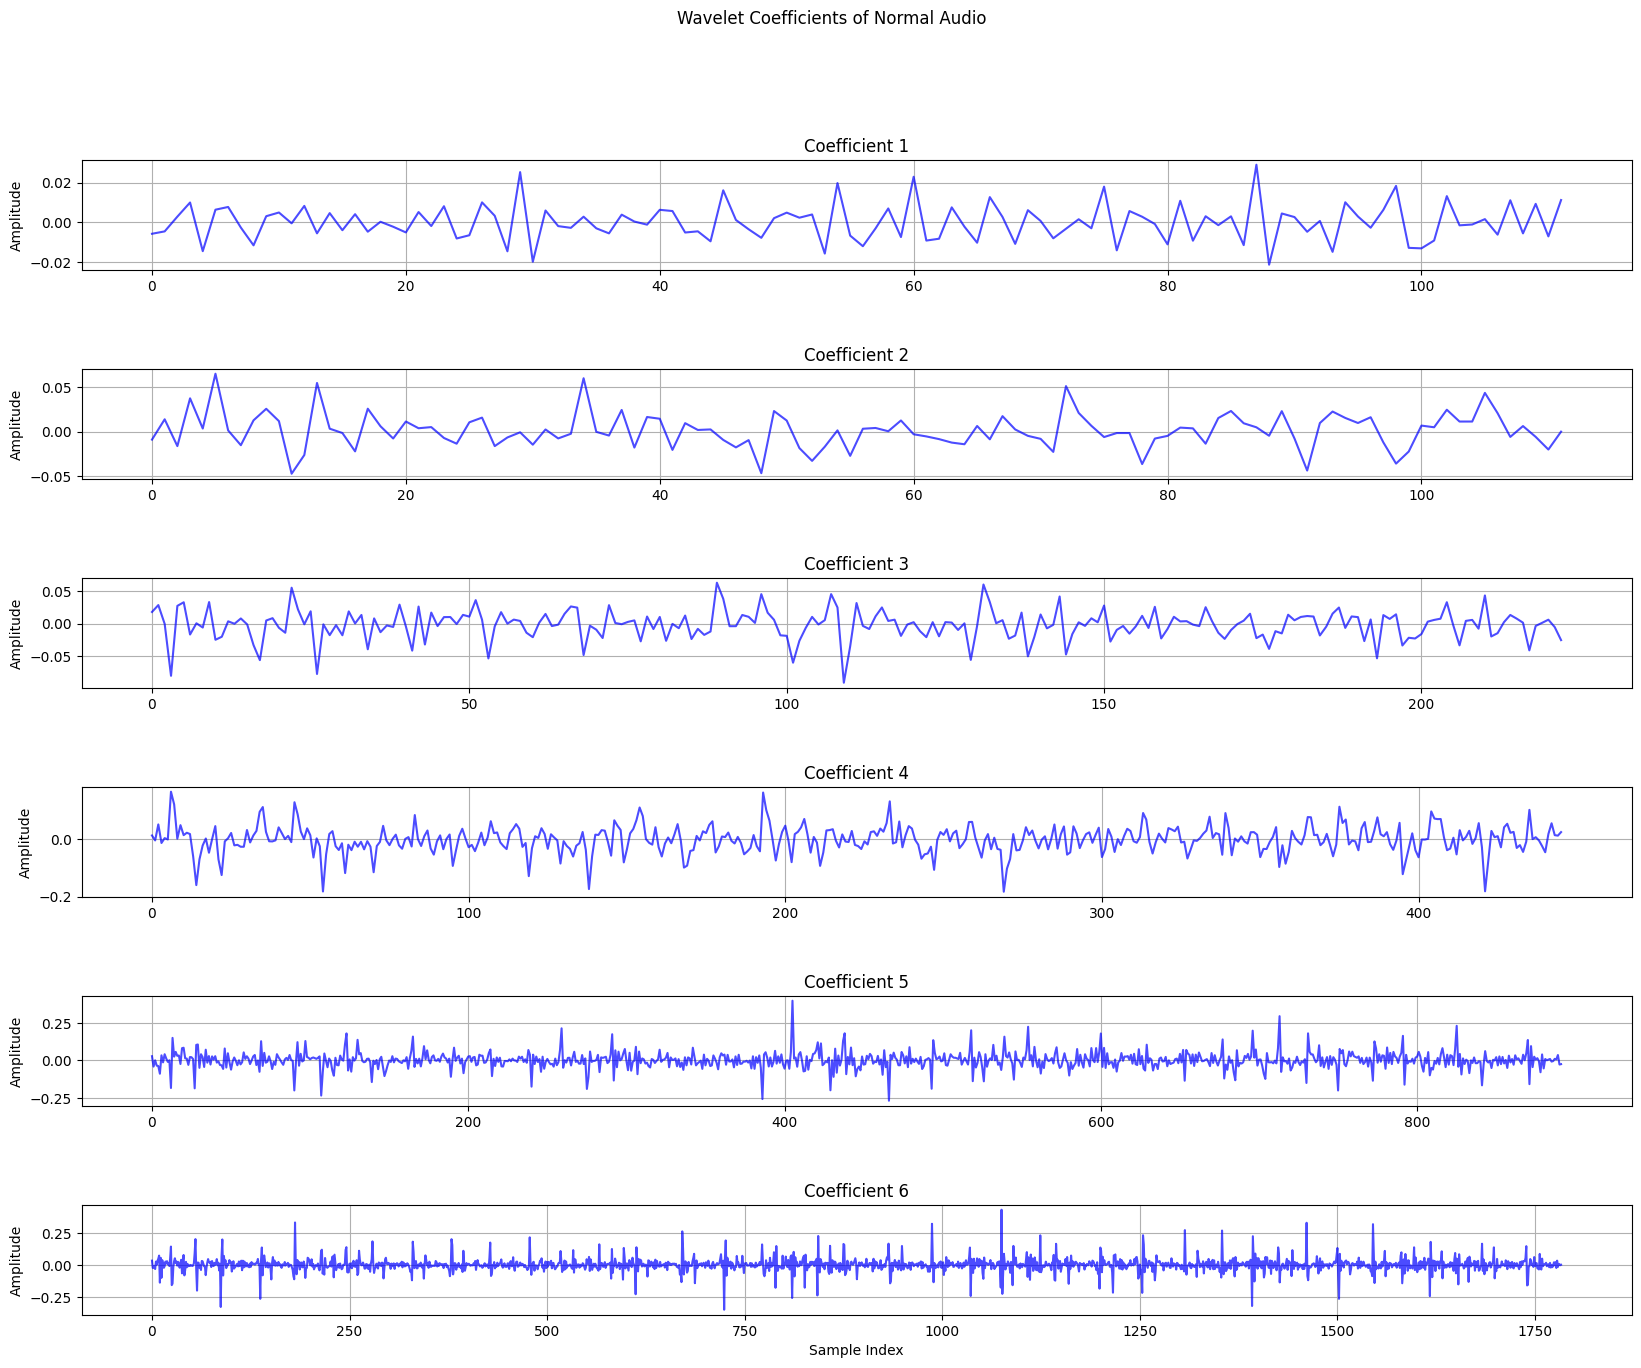

In [2]:
# Example of how to use wavelet transform on a single audio file
filename = os.getcwd() + '/data/Normal/a0007.wav'

# Load audio file
data, sr = librosa.load(filename)

# Resample audio data to new sample rate
new_sample_rate = 100
resampled_data = librosa.resample(y=data, orig_sr=sr, target_sr=new_sample_rate)

# Perform wavelet transform
wavelet_coeffs = pywt.wavedec(resampled_data, 'haar', level=5)
cA1, cD5, cD4, cD3, cD2, cD1 = wavelet_coeffs

# Plot wavelet coefficients
plt.figure(figsize=(20, 15))  # Increase the plot window size
for i, coeff in enumerate(wavelet_coeffs):
    plt.subplot(6, 1, i+1)
    plt.plot(coeff, color='b', alpha=0.7)
    plt.ylabel('Amplitude')
    plt.title(f'Coefficient {i+1}')
    plt.grid(True)

plt.subplots_adjust(hspace=0.9)  # Increase the vertical space between subplots
plt.suptitle('Wavelet Coefficients of Normal Audio')  # Add a title to the entire plot
plt.xlabel('Sample Index')
plt.show()


### Sample output for a Abnormal Test Case 

<Figure size 640x480 with 0 Axes>

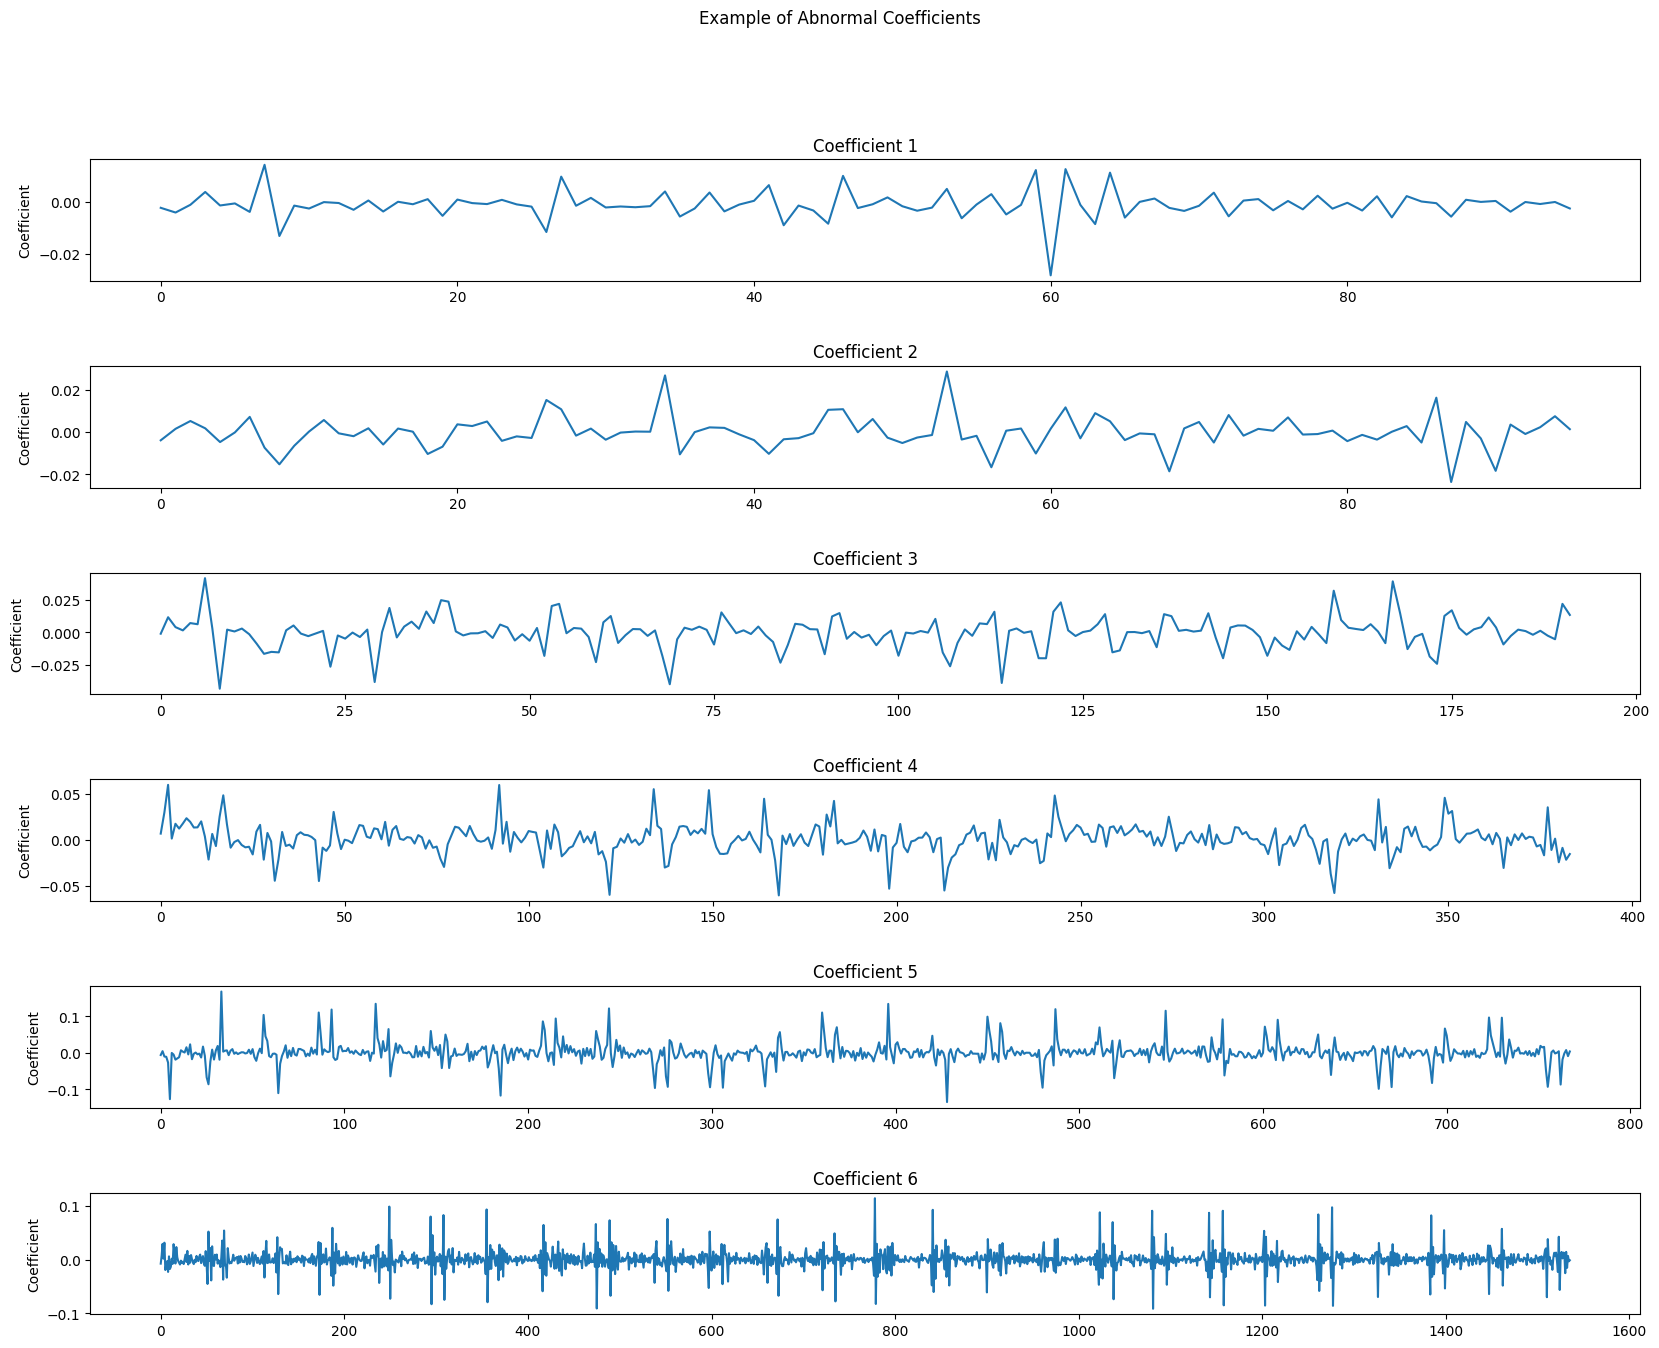

In [3]:
#Example of how to use wavelet transform on a single audio file
filename = os.getcwd() + '/data/Abnormal/a0003.wav'
data , sr = librosa.load(filename)


new_sample_rate = 100
resampled_data = librosa.resample(y=data,orig_sr=sr,target_sr=new_sample_rate)

wavelet_coeffs = pywt.wavedec(resampled_data, 'haar', level=5)
cA1, cD5, cD4, cD3, cD2, cD1 = wavelet_coeffs

# plot
plt.figure()
wavelet_coeffs = [cA1, cD5, cD4, cD3, cD2, cD1]
plt.figure(figsize=(20, 15))  # Increase the plot window size
for i, coeff in enumerate(wavelet_coeffs):
    plt.subplot(6, 1, i+1)
    plt.plot(coeff)
    plt.ylabel('Coefficient')
    plt.title(f'Coefficient {i+1}')

plt.subplots_adjust(hspace=0.7)  # Increase the vertical space between subplots
plt.suptitle('Example of Abnormal Coefficients')  # Add a title to the entire plot
plt.show()


### Extraction of Audio files along with labels and spilt them into training and testing set

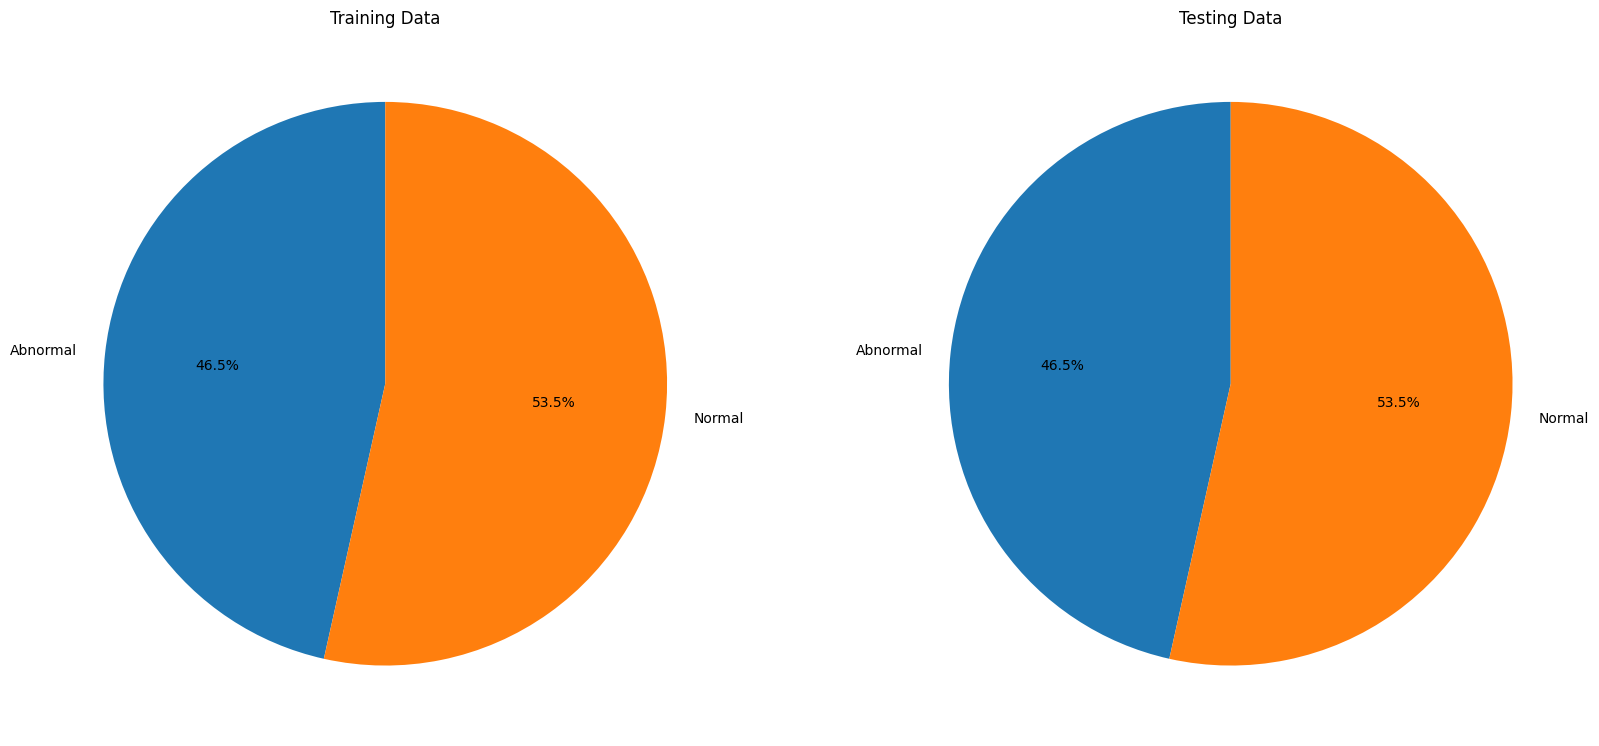

In [4]:

root_dir = os.getcwd() + '/data'

# Lists to store audio files and their corresponding labels
AudioFiles = []
AudioLabels = []

# Iterate through directories and files
for subdir, dirs, files in os.walk(root_dir, topdown=False):
    for file in files:
        # Check if file is a .wav file
        if file.endswith('.wav'):
            AudioFiles.append(os.path.join(subdir, file))
            if "Abnormal" in subdir:
                AudioLabels.append(0)  # Abnormal label
            elif "Normal" in subdir:
                AudioLabels.append(1)  # Normal label
        else:
            # Skip non-.wav files
            print(f"Skipping fi 2016le: {file}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(AudioFiles, AudioLabels, test_size=0.2)

# Pie chart to visualize the distribution of labels
labels = 'Abnormal', 'Normal'
sizes_train = [y_train.count(0), y_train.count(1)]
sizes_test = [y_test.count(0), y_test.count(1)]

fig, axes = plt.subplots(1, 2, figsize=(20, 15))
axes[0].pie(sizes_train, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Training Data')
axes[1].pie(sizes_test, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Testing Data')
plt.show()




### Function to resample the audio files and calculate the discrete wavelet tranform for these files

In [5]:
#write a function to calculate the discrete wavelet transform of the audio files
def wavelet_transform(data):
    wavelet = 'haar'
    level = 5
    d, sr = librosa.load(data)
    new_sample_rate = 1000
    resampled_data = librosa.resample(y=d,orig_sr=sr,target_sr=new_sample_rate)
    wavelet_coeffs = pywt.wavedec(resampled_data, wavelet, level=level)
    wavelet_coeffs = np.concatenate(wavelet_coeffs)

    
    return wavelet_coeffs
    

In [6]:
def map_plot(features, file_type):
    plt.figure(figsize=(20, 15))
    plt.plot(range(len(features)), [len(feature) for feature in features])
    plt.xlabel('Index')
    plt.ylabel('Number of Features')
    plt.title(f'Number of Features in Each {file_type} File')


### Feature Extraction process

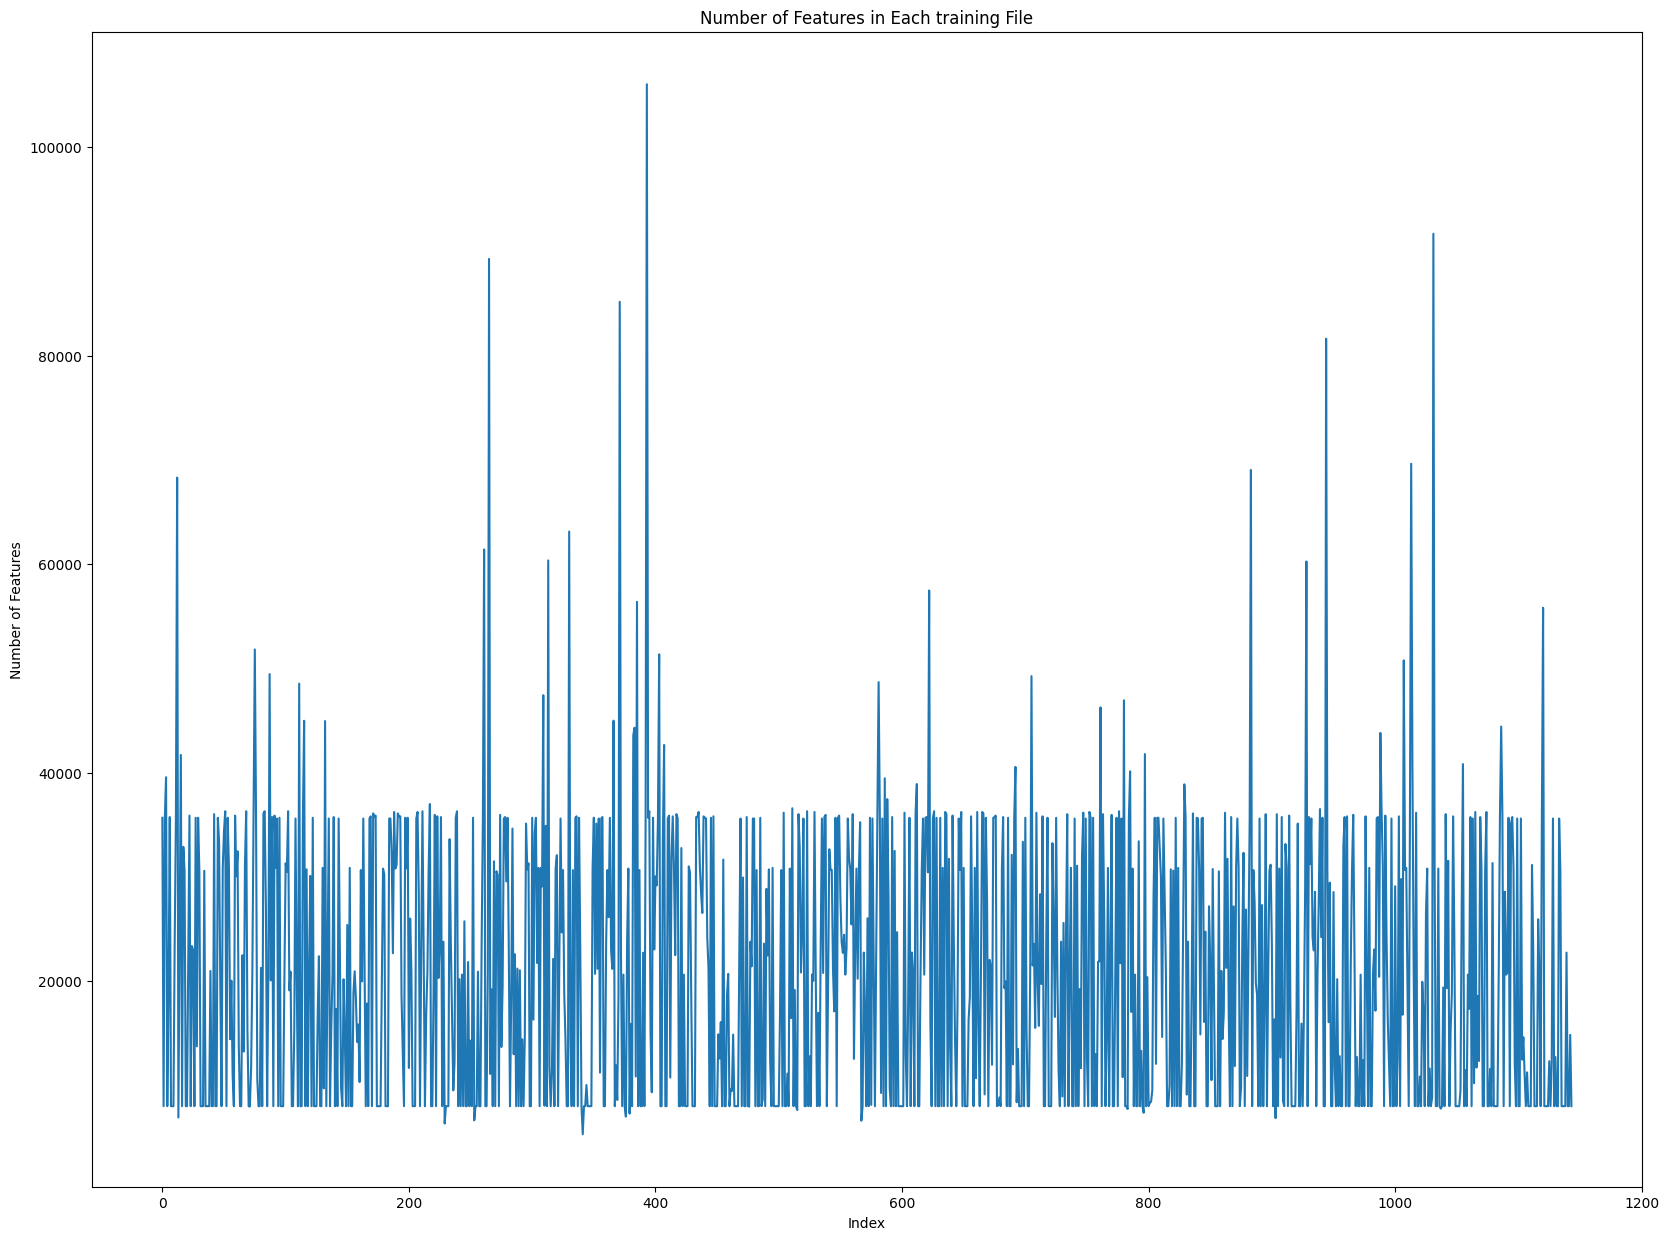

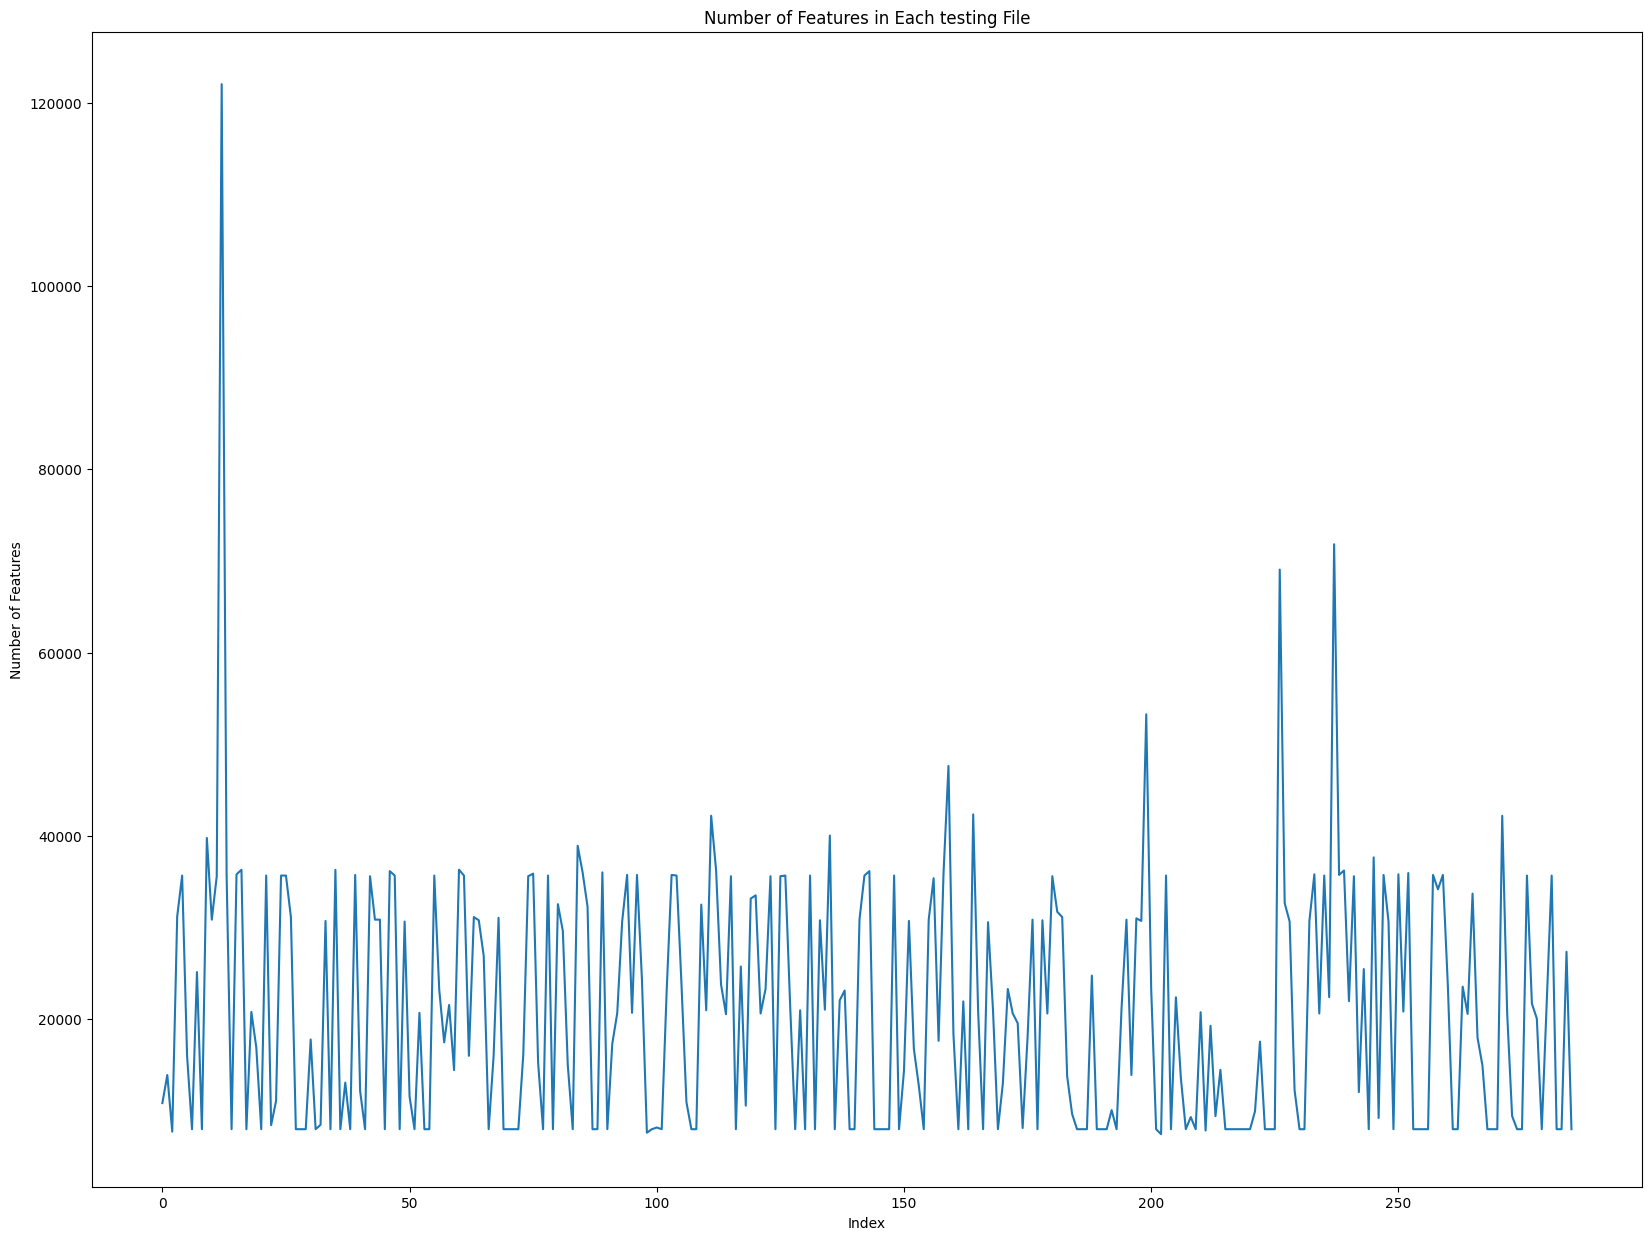

In [7]:
train_features = []
test_features = []
train_features_p = []
test_features_p = []

for file in X_train:
    #data, sr = librosa.load(file)
    wavelet_coeffs = wavelet_transform(file)
    train_features_p.append(wavelet_coeffs)

    train_features.append(wavelet_coeffs[:10000])

for file in X_test:
    #data, sr = librosa.load(file)
    wavelet_coeffs = wavelet_transform(file)
    test_features_p.append(wavelet_coeffs)

    test_features.append(wavelet_coeffs[:10000])


#plot the number of features in each audio file
map_plot(train_features_p,"training")
map_plot(test_features_p,"testing")

# Convert the lists of padded wavelet coefficients into NumPy arrays


# # Find the maximum length of the wavelet coefficients
max_length = max([len(feature) for feature in train_features + test_features])

train_features = [np.pad(feature, (0, max_length - len(feature))) for feature in train_features]
test_features = [np.pad(feature, (0, max_length - len(feature))) for feature in test_features]

train_features = np.array(train_features)
test_features = np.array(test_features)


# Convert the lists of labels into NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)





### CNN model

In [8]:
def create_model(row,col):

        model = Sequential()

        model.add(Conv1D(64, 3, activation='relu', input_shape=(row,col)))
        model.add(MaxPool1D(2))
        model.add(BatchNormalization())
        model.add(Dropout(0.7))

        model.add(Conv1D(128, 3, activation='relu'))
        model.add(MaxPool1D(2))
        model.add(BatchNormalization())
        model.add(Dropout(0.7))

        model.add(Conv1D(256, 3, activation='relu'))
        model.add(MaxPool1D(2))
        model.add(BatchNormalization())
        model.add(Dropout(0.7))
        
        model.add(Conv1D(512, 3, activation='relu'))
        model.add(MaxPool1D(2))
        model.add(BatchNormalization())
        model.add(Dropout(0.7))

        model.add(Flatten())

        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.7))
        model.add(Dense(64, activation='relu'))


        return model

### Features extracted from the CNN model ran through RandomForest Classifier 

In [9]:


model = create_model(train_features.shape[1], 1)
extracted_features = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)

# Extract features from training data
train_features = extracted_features.predict(train_features)
train_features = train_features.reshape(train_features.shape[0], -1)
train_features = train_features[:20000]

# Extract features from testing data
test_features = extracted_features.predict(test_features)
test_features = test_features.reshape(test_features.shape[0], -1)
test_features = test_features[:20000]

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(train_features, y_train)
y_pred = rf.predict(test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"The Final accuracy: {accuracy*100:.2f}")



2024-04-03 22:30:00.647569: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-03 22:30:00.648054: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


36/36 [==============================] - 1s 39ms/step


2024-04-03 22:30:02.639633: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2928054272 exceeds 10% of free system memory.


9/9 [==============================] - 0s 40ms/step
The Final accuracy: 74.83
